In [0]:
#downloading the dataset
import matplotlib.pyplot as plt 
import numpy as np
import chainer
 

#basedir = './src/cnn/images'
l = [4,30,55,72,1,95,32,57,73,91]
l.sort()
l

[1, 4, 30, 32, 55, 57, 72, 73, 91, 95]

In [0]:
#List of required image classes
CIFAR100_LABELS_LIST = {1:'aquarium fish', 4:'beaver', 30:'dolphin',
                        32:'flatfish', 55:'otter', 72:'seal', 95:'whale', 
                        57:'ray', 73:'shark', 91:'trout'}
          


#loading the dataest
train_cifar100, test_cifar100 = chainer.datasets.get_cifar100()
no_classes = 100

In [0]:
#re indexing
CIFAR100_LABELS_LIST = {1:'aquarium_fish', 4:'beaver',30: 'dolphin', 
                        32:'flatfish', 55:'otter', 57:'ray', 72:'seal',
                        73:'shark', 91:'trout', 95:'whale'}


#Selecting only required images from the loaded data set
train = []
test = []
for i in train_cifar100:
        #  i-th image data with size 32x32 and lable
        image, label_index = i
        image = image.transpose(1,2,0)
        image = np.resize(image,(64,64,3))
        if l.count(label_index)>0:
          y = (image, l.index(label_index))
          train.append(y)
for i in test_cifar100:
        #  i-th image data with size 32x32 and lable
        image, label_index = i
        image = image.transpose(1,2,0)
        image = np.resize(image,(64,64,3))
        if l.count(label_index)>0:
          y = (image, l.index(label_index))
          test.append(y)
    

In [0]:
#Converting train into x and y train
X = []
Y = []
for i in train:
  X.append(i[0])
  y = np.array([i[1]])
  Y.append(y)
x_train = np.array(X)
y_train = np.array(Y)

In [0]:
#uint8
#Converting train into x and y test
X = []
Y = []
for i in test:
  X.append(i[0])
  y = np.array([i[1]])
  Y.append(y)
x_test = np.array(X)
y_test = np.array(Y)

In [0]:
print(x_test.shape,x_train.shape)
print(y_train.shape,y_test.shape)
print(len(y_train))
print(len(y_test))

(1000, 64, 64, 3) (5000, 64, 64, 3)
(5000, 1) (1000, 1)
5000
1000


In [0]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.losses import categorical_crossentropy
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
# Model configuration
batch_size = 128
no_classes = 10
img_width, img_height, img_num_channels = 64, 64, 3
loss_function = categorical_crossentropy
data_augmentation = True
no_epochs = 100
optimizer = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6) #, momentum=0.9, nesterov=True
validation_split = 0.2
verbosity = 1

In [0]:
# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)

In [0]:
# Parse numbers as floats
x_train = x_train.astype('float32')  
x_test = x_test.astype('float32')

In [0]:
# Normalize data
x_train = x_train / 255
x_test = x_test / 255

In [0]:
# convert class labels to binary class labels
y_train = keras.utils.to_categorical(y_train, no_classes)
y_test = keras.utils.to_categorical(y_test, no_classes)
print(y_train.shape, y_test.shape)

(5000, 10) (1000, 10)


In [0]:
# Create the model
model = Sequential()

model.add(Conv2D(48, (3, 3), strides=(1, 1), input_shape=input_shape)) #layer1
model.add(Activation("relu"))
model.add(MaxPooling2D((3, 3)))

# CONV -> RELU -> BN -> Flatten
model.add(Conv2D(96, (3, 3), strides=(1, 1)))   #layer2
model.add(Activation("relu"))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(192, (3, 3), strides=(1, 1)))    #layer3
model.add(Activation("relu"))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), strides=(1, 1)))   #layer4
model.add(Activation("relu"))

model.add(BatchNormalization(axis=3))   
model.add(Flatten())
# Softmax
model.add(Dense(10, activation="softmax"))     #FC
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 62, 62, 48)        1344      
_________________________________________________________________
activation_5 (Activation)    (None, 62, 62, 48)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 20, 20, 48)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 18, 18, 96)        41568     
_________________________________________________________________
activation_6 (Activation)    (None, 18, 18, 96)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 9, 9, 96)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 192)        

In [0]:
# Compile the model
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])


In [0]:
if not data_augmentation:
    print('Not using data augmentation.')
    history = model.fit(x_train, y_train,
            batch_size = batch_size,
            epochs = no_epochs,
            verbose = verbosity,
            validation_split = validation_split,
            shuffle = True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None)
    datagen.fit(x_train)

    history = model.fit(x_train, y_train,
            batch_size = batch_size,
            epochs = no_epochs,
            verbose = verbosity,
            validation_split = validation_split,
            shuffle = True)



Using real-time data augmentation.
Train on 4000 samples, validate on 1000 samples
Epoch 1/100
4000/4000 [==============================] - 15s 4ms/step - loss: 2.2503 - accuracy: 0.2155 - val_loss: 2.2993 - val_accuracy: 0.1000
Epoch 2/100
4000/4000 [==============================] - 15s 4ms/step - loss: 2.0581 - accuracy: 0.2100 - val_loss: 2.2811 - val_accuracy: 0.1580
Epoch 3/100
4000/4000 [==============================] - 15s 4ms/step - loss: 1.9396 - accuracy: 0.2430 - val_loss: 2.2658 - val_accuracy: 0.1710
Epoch 4/100
4000/4000 [==============================] - 15s 4ms/step - loss: 1.8921 - accuracy: 0.2785 - val_loss: 2.2514 - val_accuracy: 0.1400
Epoch 5/100
4000/4000 [==============================] - 15s 4ms/step - loss: 1.8646 - accuracy: 0.2962 - val_loss: 2.3055 - val_accuracy: 0.1080
Epoch 6/100
4000/4000 [==============================] - 15s 4ms/step - loss: 1.8531 - accuracy: 0.3095 - val_loss: 2.2206 - val_accuracy: 0.1350
Epoch 7/100
4000/4000 [==================

In [0]:
 #Model evaluation
score = model.evaluate(x_test, y_test, verbose=1)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')                          #0.5210000276565552/32

1000/1000 [==============================] - 1s 1ms/step
Test loss: 2.186648036956787 / Test accuracy: 0.3440000116825104


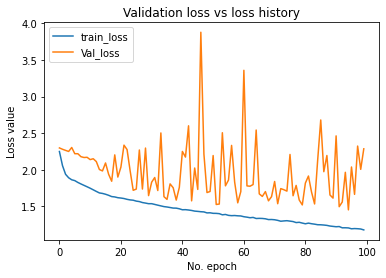

In [0]:
# Visualize history
# Plot history: Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Validation loss vs loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(['train_loss', 'Val_loss'], loc='upper left')
plt.show()


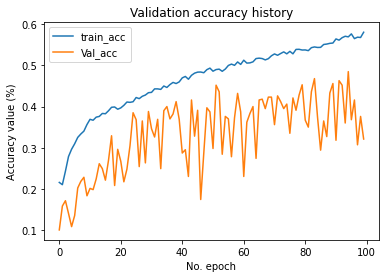

0.4675999988615513


In [0]:
# Plot history: Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.legend(['train_acc', 'Val_acc'], loc='upper left')
plt.show()
print(sum(history.history['accuracy'])/len(history.history['accuracy']))